In [332]:
# importing the important libraries.
import pandas as pd
import warnings
warnings.simplefilter('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [197]:
# Read the message activity data and preview
msg_df = pd.read_excel('MessageActivity_2020-8-20_1024.xlsx',delimiter =',')
msg_df.head()

,Hub Id,Hub Name,total_messages,last_week_messages,last_month_messages,last_quarter_messages
0,844,NetworkUSF,2260,857,1447,2195
1,370,Tri-Mentoring Program,28942,726,3110,4648
2,3,Stanford Alumni Mentoring (SAM),25120,683,2134,5125
3,19,Trojan Network,15917,659,2353,6641
4,553,The UofSC Mentorship Hub,553,468,534,553


In [198]:
# Read the sigunp activity data and preview

signup_df = pd.read_excel('SignupActivity_2020-8-20_1025.xlsx')
signup_df.tail()

,Hub Id,Hub Name,imported_users,joined_users,last_week_joined,last_month_joined,last_quarter_joined
624,207,Clemson Engineering,1.0,108.0,0.0,0.0,0.0
625,568,test5535_2,0.0,4.0,0.0,0.0,0.0
626,205,demo Clemson Business School,1.0,110.0,0.0,0.0,0.0
627,945,Hydra Connect,0.0,9.0,0.0,0.0,0.0
628,486,Support Team Connect,6.0,23.0,0.0,0.0,0.0


In [199]:
# Read the admin activity data and preview

admin_df = pd.read_excel('AdminActivity_2020-8-20_1023.xlsx',parse_dates=['Last Admin Login'])
admin_df.sample(5)

,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,Last Month Admin Logins,Last Quarter Admin Logins
124,883,Mentoring Hub,NaN,NaT,NaN,NaN,NaN
14,246,Clemson College of Business,NaN,NaT,NaN,NaN,NaN
621,156,Strayer University Peer to Peer Spring 2017,6.0,2018-03-20,0.0,0.0,0.0
471,490,Support Team Connect,6.0,2020-08-17,3.0,33.0,76.0
305,605,Montclair Connect,10.0,2020-08-19,76.0,487.0,1363.0


### Since there are null columns for each of the tables and data points as well as feature values are missing . Thus , merging all the data sets on hub_id so that all data can be together and collated for analysis.

In [200]:
req_df= pd.merge(admin_df,msg_df,left_on='id',right_on='Hub Id')
req_df.head()

,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,Last Month Admin Logins,Last Quarter Admin Logins,Hub Id,Hub Name,total_messages,last_week_messages,last_month_messages,last_quarter_messages
0,1,Campuskudos University,1.0,NaT,NaN,NaN,NaN,1,Campuskudos University,13,0,0,0
1,109,Georgetown College Connect,1.0,NaT,NaN,NaN,NaN,109,Georgetown College Connect,13,0,0,0
2,111,Yeshiva of Flatbush Connect,NaN,NaT,NaN,NaN,NaN,111,Yeshiva of Flatbush Connect,26,0,0,0
3,160,SLAC Connect,1.0,NaT,NaN,NaN,NaN,160,SLAC Connect,4,0,0,0
4,165,Intuit Women's Network,NaN,NaT,NaN,NaN,NaN,165,Intuit Women's Network,105,0,0,0


In [201]:
df_all  = pd.merge(signup_df,req_df,left_on='Hub Id',right_on='id')
df_all.head()

,Hub Id_x,Hub Name_x,imported_users,joined_users,last_week_joined,last_month_joined,last_quarter_joined,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,Last Month Admin Logins,Last Quarter Admin Logins,Hub Id_y,Hub Name_y,total_messages,last_week_messages,last_month_messages,last_quarter_messages
0,861,OneHop Alumni,136779.0,4956.0,867.0,1343.0,3709.0,861,OneHop Alumni,8.0,2020-08-19,254.0,931.0,4120.0,861,OneHop Alumni,489,95,237,488
1,379,Pitt Commons,259028.0,10824.0,743.0,1090.0,2210.0,379,Pitt Commons,29.0,2020-08-20,444.0,1121.0,2542.0,379,Pitt Commons,7473,241,476,1609
2,19,Trojan Network,183508.0,17820.0,632.0,1503.0,3798.0,19,Trojan Network,13.0,2020-08-20,558.0,1345.0,3946.0,19,Trojan Network,15917,659,2353,6641
3,844,NetworkUSF,59574.0,3814.0,612.0,1395.0,2670.0,844,NetworkUSF,5.0,2020-08-20,872.0,2903.0,4783.0,844,NetworkUSF,2260,857,1447,2195
4,889,UW Husky Landing,359360.0,1737.0,528.0,1247.0,1258.0,889,UW Husky Landing,10.0,2020-08-19,263.0,1382.0,3269.0,889,UW Husky Landing,207,113,204,207


In [202]:
finaldf = df_all.drop(['Hub Id_x', 'Hub Name_x','Hub Id_y', 'Hub Name_y'],1)

In [203]:
finaldf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 399 entries, 0 to 398
Data columns (total 16 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   imported_users             399 non-null    float64       
 1   joined_users               399 non-null    float64       
 2   last_week_joined           399 non-null    float64       
 3   last_month_joined          399 non-null    float64       
 4   last_quarter_joined        399 non-null    float64       
 5   id                         399 non-null    int64         
 6   name                       399 non-null    object        
 7   Number of Admins           385 non-null    float64       
 8   Last Admin Login           376 non-null    datetime64[ns]
 9   Last Week Admin Logins     376 non-null    float64       
 10  Last Month Admin Logins    376 non-null    float64       
 11  Last Quarter Admin Logins  376 non-null    float64       
 12  total_me

### It can be seen that same name of hub there are different Id but with different timeline for admin login.
### Thus removing the duplicate data and keeping the latest one.

In [204]:
finaldf = finaldf.drop_duplicates(subset=['name'],keep='first')

In [205]:
finaldf[finaldf.duplicated()==True].shape

(0, 16)

In [206]:
finaldf.isna().sum()

imported_users                0
joined_users                  0
last_week_joined              0
last_month_joined             0
last_quarter_joined           0
id                            0
name                          0
Number of Admins             14
Last Admin Login             23
Last Week Admin Logins       23
Last Month Admin Logins      23
Last Quarter Admin Logins    23
total_messages                0
last_week_messages            0
last_month_messages           0
last_quarter_messages         0
dtype: int64

In [207]:
finaldf = finaldf.sort_values(by='Last Admin Login',ascending=False)

In [208]:
df = finaldf.dropna()

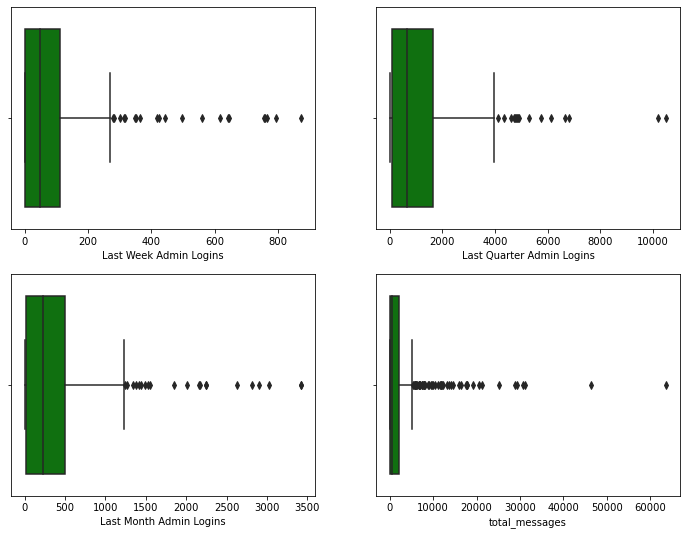

In [209]:
fig,ax = plt.subplots(2,2,figsize=(12,9))
sns.boxplot(df['Last Week Admin Logins'],ax=ax[0][0],color='green')
sns.boxplot(df['Last Quarter Admin Logins'],ax=ax[0][1],color='green')
sns.boxplot(df['Last Month Admin Logins'],ax=ax[1][0],color='green')
sns.boxplot(df['total_messages'],ax=ax[1][1],color='green')
plt.show()

In [210]:
for col in df.select_dtypes(exclude=['object','datetime64']).columns:
    df[col] = df[col].apply(lambda x : x+1 )
df.head()

,imported_users,joined_users,last_week_joined,last_month_joined,last_quarter_joined,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,Last Month Admin Logins,Last Quarter Admin Logins,total_messages,last_week_messages,last_month_messages,last_quarter_messages
168,1235.0,4084.0,7.0,38.0,127.0,328,Teach for India Connect,7.0,2020-08-20,75.0,509.0,2088.0,9620,63,330,933
45,4349.0,416.0,63.0,121.0,135.0,669,CVM Connect,8.0,2020-08-20,220.0,1138.0,2789.0,297,25,46,139
173,35613.0,1332.0,7.0,37.0,166.0,494,GGU Connect,21.0,2020-08-20,131.0,513.0,2068.0,1318,45,123,328
50,8050.0,1566.0,55.0,645.0,821.0,856,Bronco Exchange,17.0,2020-08-20,211.0,2624.0,4897.0,2383,213,1480,1788
191,2513.0,177.0,6.0,27.0,80.0,607,IBC Connect,6.0,2020-08-20,122.0,418.0,1066.0,109,14,27,56


In [211]:
from scipy import stats 
for col in df.drop(['id','name','Last Admin Login'],1).columns:
    df[col] ,lambda_value = stats.boxcox(df[col])
df.head()


,imported_users,joined_users,last_week_joined,last_month_joined,last_quarter_joined,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,Last Month Admin Logins,Last Quarter Admin Logins,total_messages,last_week_messages,last_month_messages,last_quarter_messages
168,10.991336,10.825162,1.646664,3.684502,6.083396,328,Teach for India Connect,1.726313,2020-08-20,6.064425,12.959283,23.255366,12.502880,2.921536,5.862280,9.056617
45,14.046630,7.287044,2.937862,4.877562,6.178463,669,CVM Connect,1.830012,2020-08-20,8.289571,16.245711,25.314615,6.877922,2.444058,3.856116,6.028872
173,20.240800,9.028185,1.646664,3.657146,6.504093,494,GGU Connect,2.529933,2020-08-20,7.172931,12.988633,23.189445,9.134720,2.756820,4.855641,7.338209
50,15.708929,9.280247,2.871759,6.618634,9.239478,856,Bronco Exchange,2.383854,2020-08-20,8.196366,20.306162,29.775771,10.093569,3.441067,7.400108,10.199356
191,12.661297,6.084854,1.535858,3.334321,5.380986,607,IBC Connect,1.604417,2020-08-20,7.026267,12.236573,19.014317,5.477207,2.101407,3.316183,4.735466


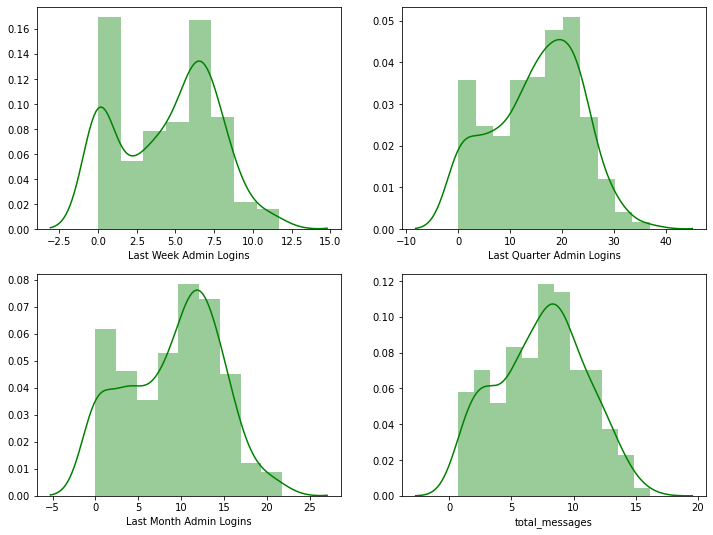

In [212]:
fig,ax = plt.subplots(2,2,figsize=(12,9))
sns.distplot(df['Last Week Admin Logins'],ax=ax[0][0],color='green')
sns.distplot(df['Last Quarter Admin Logins'],ax=ax[0][1],color='green')
sns.distplot(df['Last Month Admin Logins'],ax=ax[1][0],color='green')
sns.distplot(df['total_messages'],ax=ax[1][1],color='green')
plt.show()

In [213]:
def return_original_hubs(row):
    row['name']=row['name'].replace('\`','',regex=True)

    list_of_test_hubs = ['TFA QA','Caitlin Connect','PG SAM Training','PG UCN Training','Multi Hub1 Connect','Multi Hub2 Connect',
                     'Multi Hub3 Connect','Antonia Connect','Kelly Connect'
                     'Melissa Connect','Copyable Program Only','SAM Copyable Hub','UCN Copyable Hub'
                     'PEP Copyable Hub','UCN + Program Copyable Hub','Jon Connect','Vaishnavi','shraddhapg','siddhesh','k8s-prod-hub']

    hub_names = []
    for hub_name in row['name']:
        if  'test' in str(hub_name).lower() or 'demo' in str(hub_name).lower() or hub_name in list_of_test_hubs :
            hub_names.append(hub_name)
    return hub_names
           
df_orig = df[~(df['name'].isin(return_original_hubs(df)))]

In [214]:
df_orig.head()

,imported_users,joined_users,last_week_joined,last_month_joined,last_quarter_joined,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,Last Month Admin Logins,Last Quarter Admin Logins,total_messages,last_week_messages,last_month_messages,last_quarter_messages
168,10.991336,10.825162,1.646664,3.684502,6.083396,328,Teach for India Connect,1.726313,2020-08-20,6.064425,12.959283,23.255366,12.502880,2.921536,5.862280,9.056617
45,14.046630,7.287044,2.937862,4.877562,6.178463,669,CVM Connect,1.830012,2020-08-20,8.289571,16.245711,25.314615,6.877922,2.444058,3.856116,6.028872
173,20.240800,9.028185,1.646664,3.657146,6.504093,494,GGU Connect,2.529933,2020-08-20,7.172931,12.988633,23.189445,9.134720,2.756820,4.855641,7.338209
50,15.708929,9.280247,2.871759,6.618634,9.239478,856,Bronco Exchange,2.383854,2020-08-20,8.196366,20.306162,29.775771,10.093569,3.441067,7.400108,10.199356
191,12.661297,6.084854,1.535858,3.334321,5.380986,607,IBC Connect,1.604417,2020-08-20,7.026267,12.236573,19.014317,5.477207,2.101407,3.316183,4.735466


In [215]:
import datetime as dt
df_orig['month'] = df_orig['Last Admin Login'].dt.month
df_orig['day'] = df_orig['Last Admin Login'].dt.day
df_orig['year'] = df_orig['Last Admin Login'].dt.year
#df_orig['Weekday Name'] = df_orig.index.weekday_name


### Question 1) Which hubs have the ten most active admins? 
### Define activity as WAU (logins per month)


In [216]:
finaldf = finaldf[~(finaldf['name'].isin(return_original_hubs(finaldf)))]

In [246]:
import datetime as dt
finaldf['month'] = finaldf['Last Admin Login'].dt.month
finaldf['day'] = finaldf['Last Admin Login'].dt.day
finaldf['year'] = finaldf['Last Admin Login'].dt.year
finaldf['week'] = finaldf['Last Admin Login'].dt.week

In [171]:
adm =[]
adm =list(admin_df.columns.values)
adm.append('Login_per_admin')
adm

['id',
 'name',
 'Number of Admins',
 'Last Admin Login',
 'Last Week Admin Logins',
 'Last Month Admin Logins',
 'Last Quarter Admin Logins',
 'Login_per_admin']

In [219]:
finaldf['Login_per_admin'] = finaldf['Last Week Admin Logins']/finaldf['Number of Admins']

In [220]:
finaldf.head(2)

,imported_users,joined_users,last_week_joined,last_month_joined,last_quarter_joined,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,Last Month Admin Logins,Last Quarter Admin Logins,total_messages,last_week_messages,last_month_messages,last_quarter_messages,month,day,year,Login_per_admin
168,1234.0,4083.0,6.0,37.0,126.0,327,Teach for India Connect,6.0,2020-08-20,74.0,508.0,2087.0,9619,62,329,932,8.0,20.0,2020.0,12.333333
45,4348.0,415.0,62.0,120.0,134.0,668,CVM Connect,7.0,2020-08-20,219.0,1137.0,2788.0,296,24,45,138,8.0,20.0,2020.0,31.285714


In [173]:
admin =finaldf[adm]
#admin =  admin[admin['Last Admin Login']>='2020-07-20']

In [174]:
admin["week_no"] = pd.to_datetime(df["Last Admin Login"]).dt.week

admin.groupby('name').week_no.value_counts()

name                                week_no
100 Doors to Success                34.0       1
APF Mentorship Initiative           34.0       1
ASU Mentor Network                  34.0       1
Academic Success                    34.0       1
Alpha Phi Connect                   34.0       1
                                              ..
YU-MVP                              34.0       1
Young Latinx Professionals Network  42.0       1
ZagsConnect                         34.0       1
ZoomieLink                          34.0       1
iSchool at Illinois Mentor Match    34.0       1
Name: week_no, Length: 339, dtype: int64

In [273]:

most_active_hub = admin.groupby(['name','Last Admin Login']).agg({'Number of Admins':'sum','Login_per_admin':'mean'}).sort_values(by=['Login_per_admin'],ascending=[False]).head(10).reset_index()#.values[0:2]
#print(f'Hub having the ten most active admins: {most_active_hub}')
most_active_hub

,name,Last Admin Login,Number of Admins,Login_per_admin
0,NetworkUSF,2020-08-20,5.0,174.400000
1,PolyConnect,2020-08-20,3.0,75.666667
2,Lundquist Connect,2020-08-20,3.0,71.666667
3,Olive Grove,2020-08-19,5.0,63.600000
4,HKUST MBA Alumni Community,2020-08-20,5.0,62.400000
5,Bearcats Connect,2020-08-19,10.0,61.600000
6,True Blue Network,2020-08-19,3.0,60.666667
7,Cal State LA Alumni Mentoring Program,2020-08-20,3.0,54.000000
8,LSA Connect,2020-08-20,14.0,53.928571
9,Chatham Connect,2020-08-19,2.0,51.500000


In [274]:

least_active_hubs = admin.groupby(['name','Last Admin Login']).agg({'Number of Admins':'sum','Login_per_admin':'mean'}).sort_values(by=['Login_per_admin'],ascending=[False]).tail(10).reset_index()#.values[0:2]
#print(f'Hub having the ten most active admins: {most_active_hub}')
least_active_hubs

,name,Last Admin Login,Number of Admins,Login_per_admin
0,Random Hub,2020-08-09,14.0,0.0
1,Ramaz Alumni Professional Network,2019-10-24,4.0,0.0
2,QUT Mentoring,2020-06-02,3.0,0.0
3,Purdue Chemistry Connect,2020-05-07,1.0,0.0
4,PeopleGrove Sandbox,2020-06-15,6.0,0.0
5,UNLV - NAU Mentoring Community,2017-09-25,1.0,0.0
6,USC Social Work Connect,2020-08-04,6.0,0.0
7,PeddieConnect,2020-07-27,10.0,0.0
8,UT System,2020-07-17,3.0,0.0
9,Clemson Engineering,2020-07-22,6.0,0.0


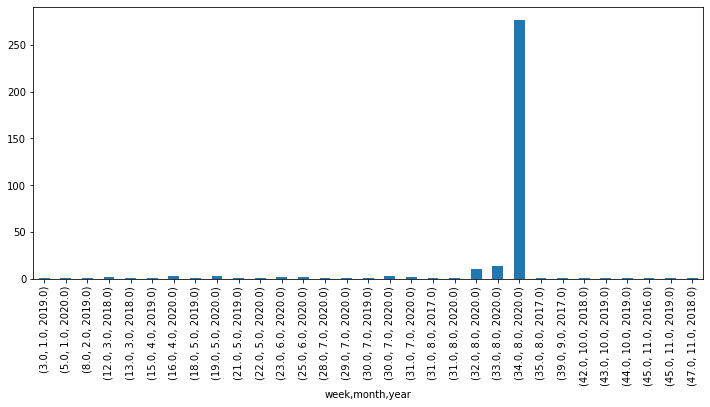

In [275]:
plt.figure(figsize=(12,5))
finaldf.groupby([finaldf['week'],finaldf['month'],finaldf['year']])['Login_per_admin'].count().plot.bar()
plt.show()

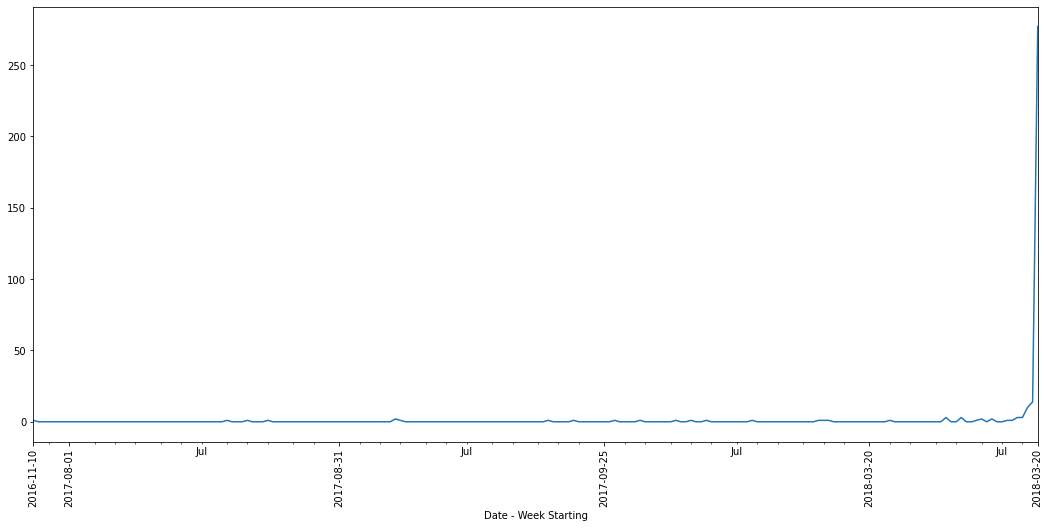

In [276]:
# set the index to be the date for the data
plt.figure(figsize=(18,8))
data1 = finaldf.sort_values('Last Admin Login').set_index('Last Admin Login')
week_groups_resample = data1.resample('W')['Login_per_admin'].count()
ax = week_groups_resample.plot(kind='line')
ax.set_xticklabels(data1.index.strftime('%Y-%m-%d'), rotation=90)
plt.xlabel('Date - Week Starting');

In [277]:
admin.groupby('name').agg({'Number of Admins':'sum'}).reset_index().shape

(358, 2)

In [178]:
admin[(admin['Last Admin Login']>='2020-08-10')&(admin['Last Admin Login']<='2020-08-16')]

,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,Last Month Admin Logins,Last Quarter Admin Logins,Login_per_admin,week_no
259,431,The Bear Exchange,2.0,2020-08-16,1.0,9.0,83.0,0.500000,33.0
295,449,Dartmouth Football Connect,4.0,2020-08-16,2.0,33.0,68.0,0.500000,33.0
306,777,CUNY BMCC Connect,11.0,2020-08-16,14.0,42.0,168.0,1.272727,33.0
257,549,Grainger Mentoring,8.0,2020-08-14,6.0,103.0,497.0,0.750000,33.0
118,435,Lafayette GatewayLink,9.0,2020-08-14,3.0,46.0,249.0,0.333333,33.0
359,467,PhoenixLink,15.0,2020-08-14,23.0,62.0,271.0,1.533333,33.0
377,13,Potomac Connect,4.0,2020-08-14,1.0,41.0,54.0,0.250000,33.0
326,791,Gallaudet Connect,6.0,2020-08-13,17.0,17.0,54.0,2.833333,33.0
263,608,MentorND,6.0,2020-08-13,2.0,2.0,446.0,0.333333,33.0
49,442,Meredith Mentors,6.0,2020-08-12,0.0,16.0,145.0,0.000000,33.0


In [254]:
# most_active_hubs = finaldf.groupby(['name']).agg({'Number of Admins':'sum'}).sort_values(by=['Last Week Admin Logins'],ascending=[False]).head(10).reset_index()#['hub_name']#.values[0:2]
# most_active_hubs

In [255]:
# plt.figure(figsize=(10,5))
# ax =sns.barplot(most_active_hubs['name'],most_active_hubs['Last Week Admin Logins'],palette='Greens_r')
# ax.set_xticklabels(ax.get_xticklabels(),rotation= 45)
# plt.title('10 Hubs having most active admins ')
# plt.show()

In [258]:
# most_active_hubs = finaldf.groupby(['name','day','month','Last Admin Login']).agg({'Last Month Admin Logins':'sum'}).sort_values(by=['Last Month Admin Logins'],ascending=[False]).head(10).reset_index()#['hub_name']#.values[0:2]
# most_active_hubs

In [259]:
# most_active_hubs = finaldf.groupby(['name','day','month','Last Admin Login']).agg({'Last Quarter Admin Logins':'sum'}).sort_values(by=['Last Quarter Admin Logins'],ascending=[False]).head(10).reset_index()#['hub_name']#.values[0:2]
# most_active_hubs

In [183]:
df_orig['Stickiness'] = df_orig['Last Week Admin Logins']/df_orig['Last Month Admin Logins']

In [184]:
df_orig.head()

,imported_users,joined_users,last_week_joined,last_month_joined,last_quarter_joined,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,Last Month Admin Logins,Last Quarter Admin Logins,total_messages,last_week_messages,last_month_messages,last_quarter_messages,month,day,year,Stickiness
168,10.991336,10.825162,1.646664,3.684502,6.083396,328,Teach for India Connect,1.726313,2020-08-20,6.064425,12.959283,23.255366,12.502880,2.921536,5.862280,9.056617,8,20,2020,0.467960
45,14.046630,7.287044,2.937862,4.877562,6.178463,669,CVM Connect,1.830012,2020-08-20,8.289571,16.245711,25.314615,6.877922,2.444058,3.856116,6.028872,8,20,2020,0.510262
173,20.240800,9.028185,1.646664,3.657146,6.504093,494,GGU Connect,2.529933,2020-08-20,7.172931,12.988633,23.189445,9.134720,2.756820,4.855641,7.338209,8,20,2020,0.552247
50,15.708929,9.280247,2.871759,6.618634,9.239478,856,Bronco Exchange,2.383854,2020-08-20,8.196366,20.306162,29.775771,10.093569,3.441067,7.400108,10.199356,8,20,2020,0.403639
191,12.661297,6.084854,1.535858,3.334321,5.380986,607,IBC Connect,1.604417,2020-08-20,7.026267,12.236573,19.014317,5.477207,2.101407,3.316183,4.735466,8,20,2020,0.574202


In [185]:
df_orig.isna().sum()

imported_users                0
joined_users                  0
last_week_joined              0
last_month_joined             0
last_quarter_joined           0
id                            0
name                          0
Number of Admins              0
Last Admin Login              0
Last Week Admin Logins        0
Last Month Admin Logins       0
Last Quarter Admin Logins     0
total_messages                0
last_week_messages            0
last_month_messages           0
last_quarter_messages         0
month                         0
day                           0
year                          0
Stickiness                   32
dtype: int64

In [260]:
# df_time_series = df_orig.set_index('Last Admin Login')
# df_time_series['WeekdayName'] = df_time_series.index.weekday
# df_time_series.head(3)
finaldf.head()

,imported_users,joined_users,last_week_joined,last_month_joined,last_quarter_joined,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,...,Last Quarter Admin Logins,total_messages,last_week_messages,last_month_messages,last_quarter_messages,month,day,year,Login_per_admin,week
168,1234.0,4083.0,6.0,37.0,126.0,327,Teach for India Connect,6.0,2020-08-20,74.0,...,2087.0,9619,62,329,932,8.0,20.0,2020.0,12.333333,34.0
45,4348.0,415.0,62.0,120.0,134.0,668,CVM Connect,7.0,2020-08-20,219.0,...,2788.0,296,24,45,138,8.0,20.0,2020.0,31.285714,34.0
173,35612.0,1331.0,6.0,36.0,165.0,493,GGU Connect,20.0,2020-08-20,130.0,...,2067.0,1317,44,122,327,8.0,20.0,2020.0,6.500000,34.0
50,8049.0,1565.0,54.0,644.0,820.0,855,Bronco Exchange,16.0,2020-08-20,210.0,...,4896.0,2382,212,1479,1787,8.0,20.0,2020.0,13.125000,34.0
191,2512.0,176.0,5.0,26.0,79.0,606,IBC Connect,5.0,2020-08-20,121.0,...,1065.0,108,13,26,55,8.0,20.0,2020.0,24.200000,34.0


In [310]:
import featuretools as ft

In [330]:

# es = ft.EntitySet(id = 'finaldf')
# es.entity_from_dataframe(entity_id = 'data', dataframe = finaldf.drop(['year','month','week','day'],1),  index = 'id')

# # Run deep feature synthesis with transformation primitives
# feature_matrix, feature_defs = ft.dfs(entityset = es, target_entity = 'data',max_depth=2,
#                                       trans_primitives = [ 'divide_numeric'])

# feature_matrix.head()

In [331]:
# feature_matrix.columns

In [305]:
#Admin Activity : 
#This defines the on an average activity(login) of the single admin in a particular hub for a week/month/quarter.
#This will be used for comparative analysis with message and signup activity.
finaldf['admin_activity_week'] = finaldf['Last Week Admin Logins']/finaldf['Number of Admins']
finaldf['admin_activity_month'] = finaldf['Last Month Admin Logins']/finaldf['Number of Admins']
finaldf['admin_activity_quarter'] = finaldf['Last Quarter Admin Logins']/finaldf['Number of Admins']

#Messaging Rate wrt Users : 
#This defines the number of messages sent with respect to the number of users joined for week/month/quarter 
#and total(total messages/total users [imported+joined]) for each hub
finaldf['messaging_rate_week_users'] = finaldf['last_week_messages']/finaldf['last_week_joined']
finaldf['messaging_rate_month_users'] = finaldf['last_month_messages']/finaldf['last_month_joined']
finaldf['messaging_rate_quarter_users'] = finaldf['last_quarter_messages']/finaldf['last_quarter_joined']
finaldf['messaging_rate_users'] = finaldf['total_messages']/(finaldf['imported_users']+finaldf['joined_users'])

#Messaging Rate wrt Admins Explicit : 
#This defines the number of messages sent with respect to the number of admins login for week/month/quarter .
finaldf['messaging_rate_week_admin'] = finaldf['last_week_messages']/finaldf['Last Week Admin Logins']
finaldf['messaging_rate_month_admin'] = finaldf['last_month_messages']/finaldf['Last Month Admin Logins']
finaldf['messaging_rate_quarter_admin'] = finaldf['last_quarter_messages']/finaldf['Last Quarter Admin Logins']

#Sign-Up Rate wrt Admins :
#This defines the number of users joined with respect to number of admin logins for week/month/quarter.
finaldf['signup_rate_week'] = finaldf['last_week_joined']/finaldf['Last Week Admin Logins']
finaldf['signup_rate_month'] = finaldf['last_month_joined']/finaldf['Last Month Admin Logins']
finaldf['signup_rate_quarter'] = finaldf['last_quarter_joined']/finaldf['Last Quarter Admin Logins']



In [306]:
finaldf.head()

,imported_users,joined_users,last_week_joined,last_month_joined,last_quarter_joined,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,...,total_messages,last_week_messages,last_month_messages,last_quarter_messages,month,day,year,Login_per_admin,week,messaging_rate
168,1234.0,4083.0,6.0,37.0,126.0,327,Teach for India Connect,6.0,2020-08-20,74.0,...,9619,62,329,932,8.0,20.0,2020.0,12.333333,34.0,10.333333
45,4348.0,415.0,62.0,120.0,134.0,668,CVM Connect,7.0,2020-08-20,219.0,...,296,24,45,138,8.0,20.0,2020.0,31.285714,34.0,0.387097
173,35612.0,1331.0,6.0,36.0,165.0,493,GGU Connect,20.0,2020-08-20,130.0,...,1317,44,122,327,8.0,20.0,2020.0,6.500000,34.0,7.333333
50,8049.0,1565.0,54.0,644.0,820.0,855,Bronco Exchange,16.0,2020-08-20,210.0,...,2382,212,1479,1787,8.0,20.0,2020.0,13.125000,34.0,3.925926
191,2512.0,176.0,5.0,26.0,79.0,606,IBC Connect,5.0,2020-08-20,121.0,...,108,13,26,55,8.0,20.0,2020.0,24.200000,34.0,2.600000


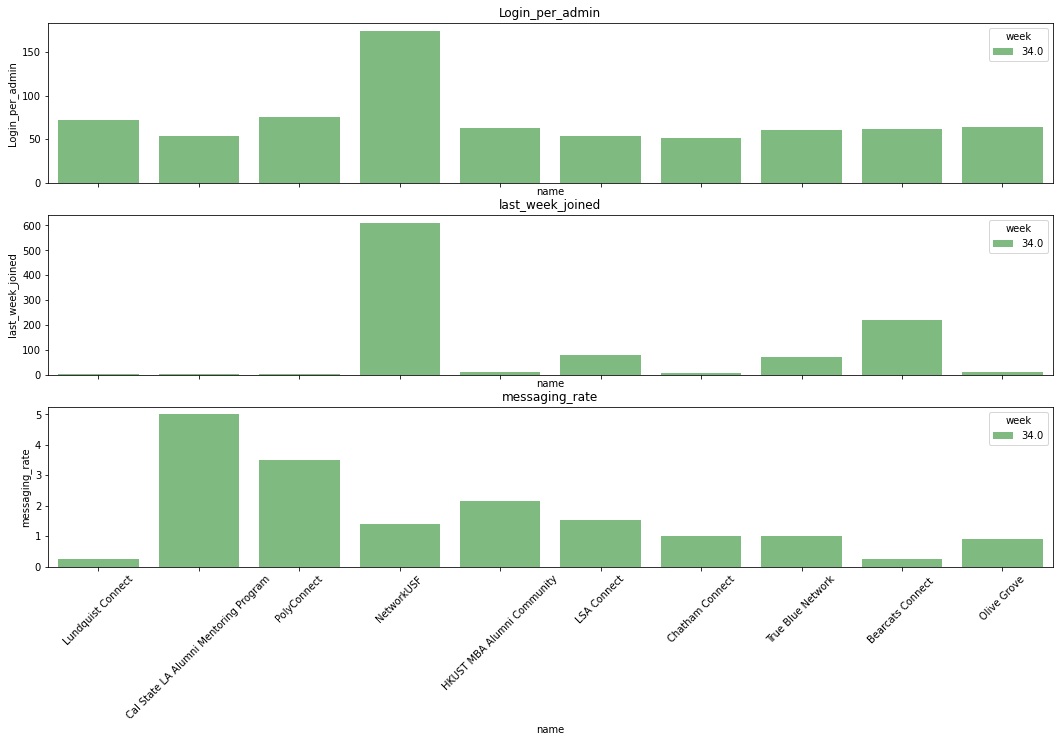

In [307]:
# plt.figure(figsize=(15,5))
# sns.lineplot(finaldf['week'],finaldf['last_week_joined'])
# sns.lineplot(finaldf['week'],finaldf['Last Week Admin Logins'])
# sns.lineplot(finaldf['week'],finaldf['last_week_messages'])
fig, axes = plt.subplots(3, 1, figsize=(18, 10), sharex=True)
a = finaldf[finaldf['name'].isin(most_active_hub['name'])]
for name, ax in zip(['Login_per_admin', 'last_week_joined', 'messaging_rate'], axes):
    sns.barplot(data=a, x=a['name'] ,y=name,hue='week',ax=ax,palette = 'Greens_r')
    ax.set_xticklabels(ax.get_xticklabels(),rotation= 45)
    ax.set_title(name)
    

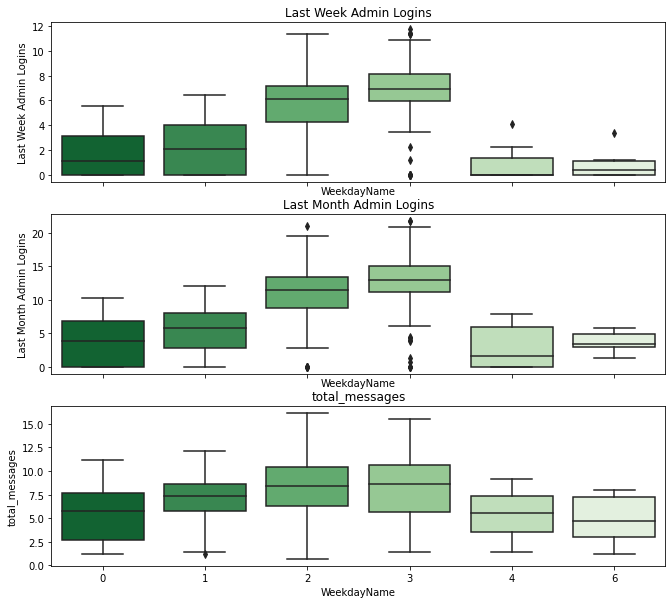

In [187]:
fig, axes = plt.subplots(3, 1, figsize=(11, 10), sharex=True)
for name, ax in zip(['Last Week Admin Logins', 'Last Month Admin Logins', 'total_messages'], axes):
    sns.boxplot(data=df_time_series, x='WeekdayName', y=name, ax=ax,palette = 'Greens_r')
    ax.set_title(name)

In [188]:
finaldf.head()

,imported_users,joined_users,last_week_joined,last_month_joined,last_quarter_joined,id,name,Number of Admins,Last Admin Login,Last Week Admin Logins,Last Month Admin Logins,Last Quarter Admin Logins,total_messages,last_week_messages,last_month_messages,last_quarter_messages,month,day,year,Login_per_admin
168,1234.0,4083.0,6.0,37.0,126.0,327,Teach for India Connect,6.0,2020-08-20,74.0,508.0,2087.0,9619,62,329,932,8.0,20.0,2020.0,12.333333
45,4348.0,415.0,62.0,120.0,134.0,668,CVM Connect,7.0,2020-08-20,219.0,1137.0,2788.0,296,24,45,138,8.0,20.0,2020.0,31.285714
173,35612.0,1331.0,6.0,36.0,165.0,493,GGU Connect,20.0,2020-08-20,130.0,512.0,2067.0,1317,44,122,327,8.0,20.0,2020.0,6.500000
50,8049.0,1565.0,54.0,644.0,820.0,855,Bronco Exchange,16.0,2020-08-20,210.0,2623.0,4896.0,2382,212,1479,1787,8.0,20.0,2020.0,13.125000
191,2512.0,176.0,5.0,26.0,79.0,606,IBC Connect,5.0,2020-08-20,121.0,417.0,1065.0,108,13,26,55,8.0,20.0,2020.0,24.200000


In [189]:
weekly_average_admin = (finaldf.reset_index().set_index("Last Admin Login").groupby(pd.Grouper(freq='W'))).agg({"Last Week Admin Logins":"mean"}).reset_index()

In [38]:
weekly_average_admin.fillna(0).sort_values(by = 'Last Week Admin Logins',ascending=False)

,Last Admin Login,Last Week Admin Logins
197,2020-08-23,115.431095
196,2020-08-16,4.312500
136,2019-06-23,0.000000
126,2019-04-14,0.000000
127,2019-04-21,0.000000
...,...,...
68,2018-03-04,0.000000
69,2018-03-11,0.000000
70,2018-03-18,0.000000
71,2018-03-25,0.000000


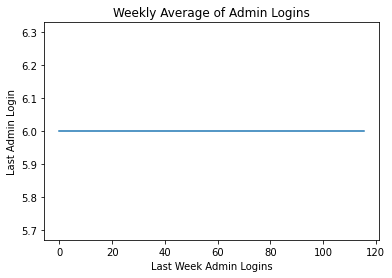

In [39]:
#weekly_average_admin.dropna().set_index('Last Admin Login')['Last Week Admin Logins'].plot()
sns.lineplot(weekly_average_admin.dropna()['Last Week Admin Logins'],weekly_average_admin.dropna().set_index("Last Admin Login").index.weekday)
plt.title('Weekly Average of Admin Logins')
plt.show()

In [40]:
monthly_average_admin=(finaldf.reset_index().set_index("Last Admin Login").groupby(pd.Grouper(freq='M'))).agg({"Last Month Admin Logins":"mean"}).reset_index()

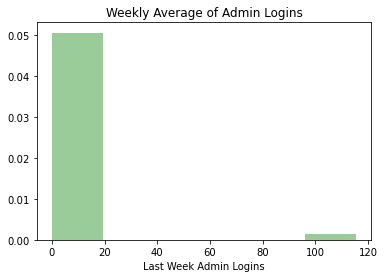

In [41]:
sns.distplot(weekly_average_admin['Last Week Admin Logins'].dropna(),color = 'Green')
plt.title('Weekly Average of Admin Logins')
plt.show()

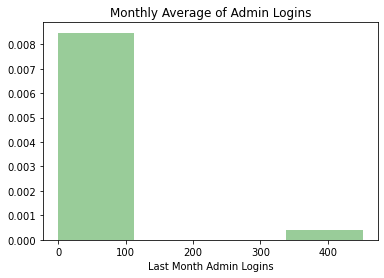

In [42]:
sns.distplot(monthly_average_admin['Last Month Admin Logins'].dropna(),color = 'Green')
plt.title('Monthly Average of Admin Logins')
plt.show()

In [43]:
monthly_average_admin.fillna(0).sort_values(by='Last Month Admin Logins',ascending=False)

,Last Admin Login,Last Month Admin Logins
45,2020-08-31,451.586207
44,2020-07-31,7.615385
34,2019-09-30,0.000000
25,2018-12-31,0.000000
26,2019-01-31,0.000000
27,2019-02-28,0.000000
28,2019-03-31,0.000000
29,2019-04-30,0.000000
30,2019-05-31,0.000000
31,2019-06-30,0.000000


In [44]:
df_rel = df_orig[['Last Week Admin Logins','Last Month Admin Logins','Last Quarter Admin Logins','total_messages','last_week_messages','last_month_messages','last_quarter_messages']]

In [45]:
#imported_users	joined_users	last_week_joined	last_month_joined	last_quarter_joined
df_signup = df_orig[['Last Week Admin Logins','Last Month Admin Logins','Last Quarter Admin Logins','imported_users','last_quarter_joined','last_week_joined','joined_users']]

In [ ]:
for i in ['Last Week Admin Logins','Last Month Admin Logins','Last Quarter Admin Logins','total_messages','last_week_messages','last_month_messages','last_quarter_messages']:
    for j in ['Last Week Admin Logins','Last Month Admin Logins','Last Quarter Admin Logins','total_messages','last_week_messages','last_month_messages','last_quarter_messages']:
        if i!=j:
            plt.title(f'Correlation b/w {i} & {j}')
            sns.scatterplot(df_rel[i],df_rel[j],color='green')
            plt.show()
        

In [ ]:
#plt.figure(figsize = (12,5))
plt.figure(figsize=(10,8))

sns.heatmap(np.abs(df_rel.corr()),annot=True,
            center=0,linewidth=0.5,
            cbar=False,
            cmap="Greens_r")
plt.show()

In [ ]:
#plt.figure(figsize = (12,5))
plt.figure(figsize=(10,8))

sns.heatmap(np.abs(df_signup.corr()),annot=True,
            center=0,linewidth=0.5,
            cbar=False,
            cmap="Greens_r")
plt.show()

In [ ]:
for i in ['Last Week Admin Logins','Last Month Admin Logins','Last Quarter Admin Logins','imported_users','last_quarter_joined','last_week_joined','joined_users']:
    for j in ['Last Week Admin Logins','Last Month Admin Logins','Last Quarter Admin Logins','imported_users','last_quarter_joined','last_week_joined','joined_users']:
        if i!=j:
            plt.title(f'Correlation b/w {i} & {j}')
            sns.scatterplot(df_signup[i],df_signup[j],color='green')
            plt.show()
        